In [63]:
import os
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import transforms

import rasterio

import matplotlib.pyplot as plt


print("torch   : {}".format(torch.__version__))
print("rasterio: {}".format(rasterio.__version__))

torch   : 1.13.0
rasterio: 1.2.10


## Load the dataset of satellite images and their labels

Firstly, we need to import the created dataset. To do so, we need to create two instances of DataLoader.　For creating a Dataset, __len__(), __getitem__() are necessarily specified.

In [65]:
# create a class for Dataset
class RemoteSensingDataset(Dataset):
    def __init__(self, img_dir, label_dir):
        super().__init__()
        
        self.img_dir    = img_dir
        self.label_dir  = label_dir
        self.img_list   = os.listdir(img_dir)
        self.label_list = os.listdir(label_dir)
        
    def __len__(self):   
        return len(self.img_list)
        
    def __getitem__(self, idx):
        
        # import raster file
        img   = rasterio.open(os.path.join(self.img_dir, self.img_list[idx]))
        label = rasterio.open(os.path.join(self.label_dir, self.label_list[idx]))
        
        # extract the numpy ndarray
        img = img.read()
        label = label.read()
        
        # transform the numpy ndarray into tensor
        img = torch.from_numpy(img)
        label = torch.from_numpy(label)
        
        return img, label

In [66]:
# create an instance
remote_sensing_dataset = RemoteSensingDataset("../data/output/image", "../data/output/label")

([], [])

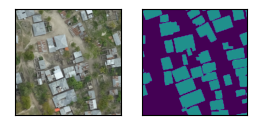

In [106]:
# example: first index of the dataset
img, label = remote_sensing_dataset[0]

fig, ax = plt.subplots(figsize=(3,3))

plt.subplot(1,2,1)
plt.imshow(img.numpy().transpose(1,2,0))

plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(label.numpy().transpose(1,2,0))

plt.xticks([])
plt.yticks([])

In [68]:
# check the shape of image
img.shape

torch.Size([3, 1024, 1024])

In [69]:
# check the shape of label
label.shape

torch.Size([1, 1024, 1024])

In [74]:
#set a seed for random variable
torch.manual_seed(0)

# set the size of train and test dataset
train_size = int(len(remote_sensing_dataset) * 0.8)
test_size  = len(remote_sensing_dataset) - train_size

# split the dataset
train_dataset, test_dataset = random_split(remote_sensing_dataset, [train_size, test_size])

In [79]:
# create dataloaders
batch_size = 32

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle = True)

## Build an U-Net model

In [ ]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        
    def forward(self, x):
        

## Train the model

## Evaluate the model